In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
from pixell import curvedsky
from pixell import powspec
from pixell import utils, sharp, enmap
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

In [3]:
from pixell import enplot

In [4]:
fname = "data/new_ethos_a4_scalCls.dat"
CMB, lensing = powspec.read_camb_scalar(fname)

In [26]:
map_shape=(1,4000,4000)
wcs = curvedsky.wcsutils.build( pos=(0.0,0.0), res=1.0 / 60, system="CAR")
test_map = curvedsky.rand_map(map_shape,  wcs, CMB, lmax=5000, spin=0, verbose=True)

Generating alms with seed None up to lmax=5000 dtype D
Allocating output map shape (1, 4000, 4000) dtype d
Allocating shape (1, 4000, 21600) dtype d intermediate map
Performing alm2map


In [27]:
nside = 2048
enmap.write_map("fakeACT_car.fits", test_map)
hp.write_map("fakeACT_heal.fits", enmap.to_healpix(test_map[0,:,:], nside=nside), overwrite=True)

mask = test_map[:]
mask = mask * 0 + 1

enmap.write_map("fakeACT_carmask.fits", mask)
hp.write_map("fakeACT_healmask.fits", enmap.to_healpix(mask[0,:,:], nside=nside), overwrite=True)

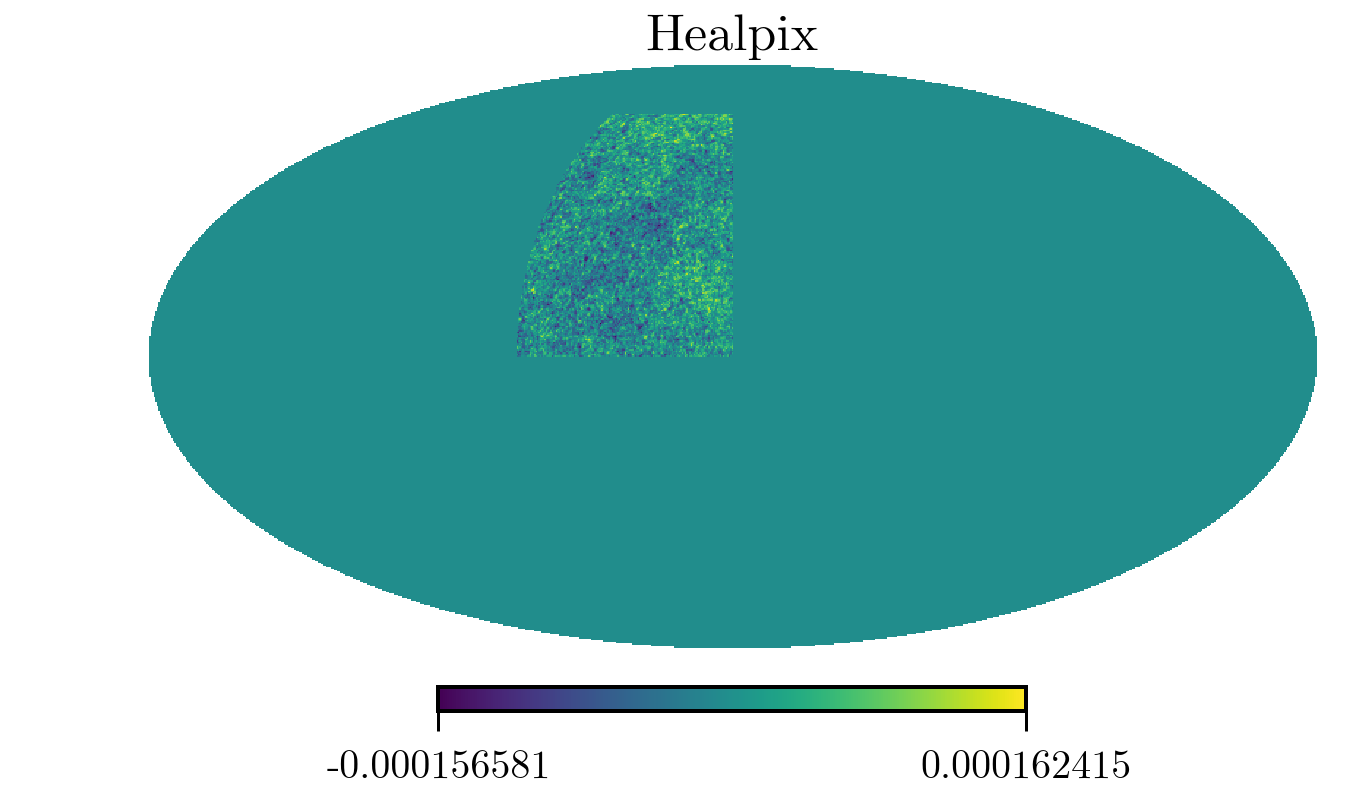

In [28]:

hp.mollview(enmap.to_healpix(test_map, nside=512)[0,:],  title="Healpix")

# Analysis

Now one runs the program in `ACT_test.c`, which generates `sample_out.txt` and `sample_output_heal.txt`. 

In [29]:
! ./ACT_test

CAR
neq, 5399 
healpix
ABOUT TO COMPUTE PS


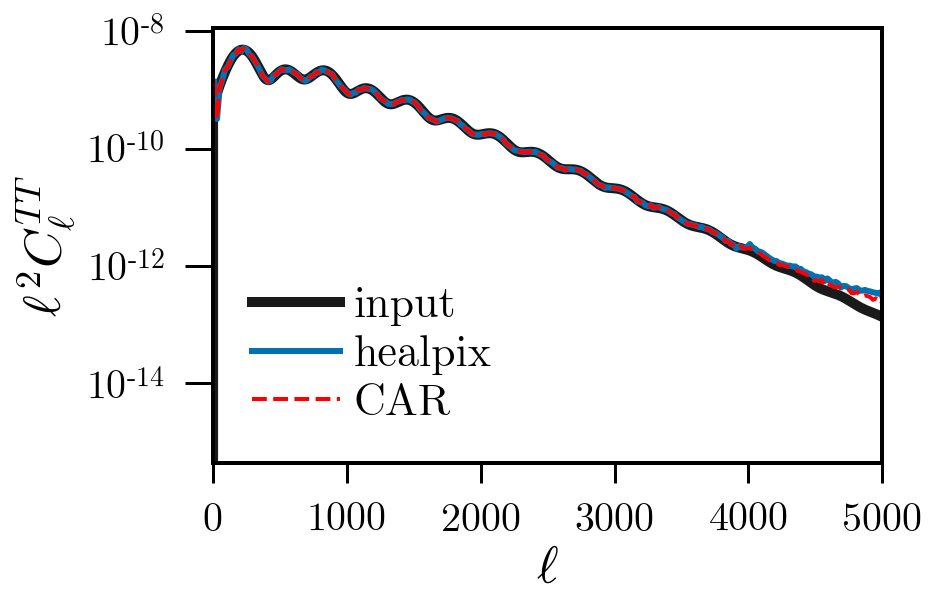

In [32]:
from astropy.io import ascii

data2 = ascii.read("sample_output.txt")
plt.plot(np.arange(5501), np.arange(5501)**2 * CMB[0,0,:], lw=5, label="input")

data1 = ascii.read("sample_output_heal.txt")  
plt.plot(data1['col1'], data1['col1']**2 * data1['col2'], label="healpix", lw = 3)
plt.plot(data2['col1'], data2['col1']**2 * data2['col2'], lw=2, label="CAR", color="red", ls="dashed")

plt.xlim(0,5000)
plt.yscale("log")
plt.ylabel(r"$\ell^2 C_{\ell}^{TT}$")
plt.xlabel(r"$\ell$")

plt.legend()

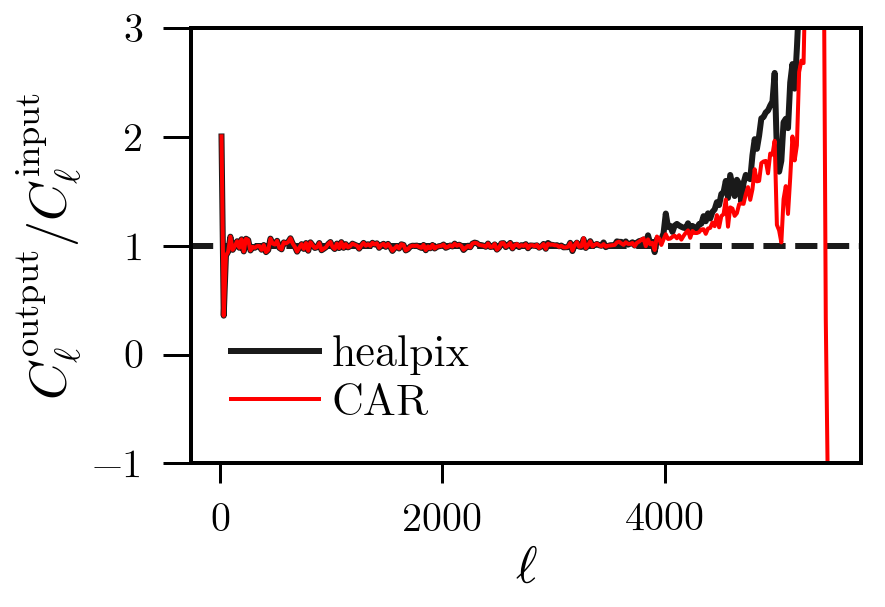

In [33]:

data1 = ascii.read("sample_output_heal.txt")  
data1 = data1[data1['col1'] < 5500]
data2 = ascii.read("sample_output.txt")
data2 = data2[data2['col1'] < 5500]
# plt.plot(np.arange(5501), np.arange(5501)**4 * CMB[0,0,:])

plt.axhline(1, ls="dashed")
plt.plot(data1['col1'], data1['col2'] / CMB[0,0,:][data1['col1'].astype(int)], label="healpix", lw = 3)
plt.plot(data2['col1'], data2['col2'] / CMB[0,0,:][data2['col1'].astype(int)], lw=2, label="CAR", color="red", ls="solid")
plt.ylim(-1,3)

plt.ylabel(r"$C_{\ell}^{\mathrm{output}} / C_{\ell}^{\mathrm{input}}$")
plt.xlabel(r"$\ell$")
plt.legend()